In [1]:
import json
import numpy as np
import os

from lmfit import Model

import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
input_file = "/Users/j35/Desktop/debug_fit.json"
assert os.path.exists(input_file)

In [3]:
with open(input_file, 'r') as read_file:
    data = json.load(read_file)

In [4]:
x_axis_full = np.array(data['x_axis'])
y_axis_full = np.array(data['y_axis'])
assert len(x_axis_full) == len(y_axis_full)

In [5]:
last_index = 1000
x_axis = x_axis_full[0: last_index]
y_axis = y_axis_full[0: last_index]

<IPython.core.display.Javascript object>


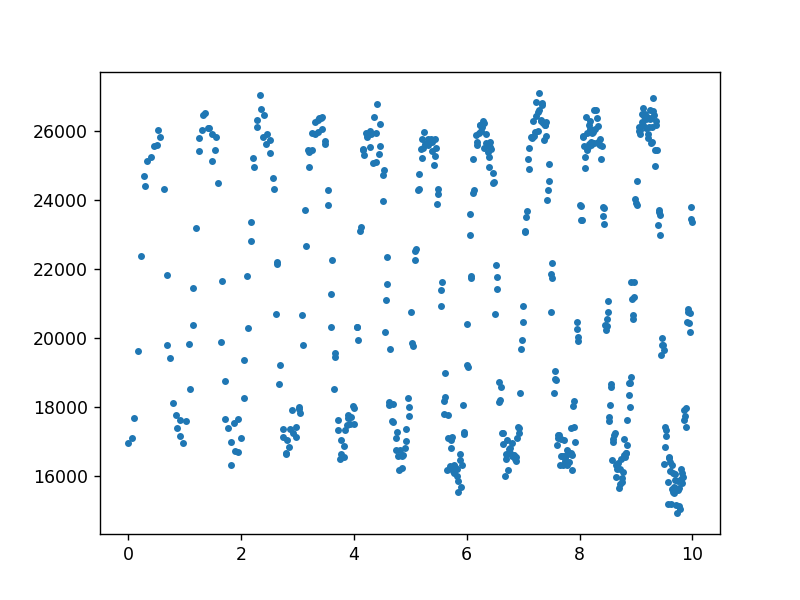

In [6]:
plt.figure(0)
plt.plot(x_axis, y_axis, '.')

# fitting 

In [29]:
def sin_fit(angle, a, m, p, b):
    """
    :parameter
    ==========
    angle: angle (in degrees)
    a: para to fit
    m: para to fit
    p: para to fit
    b: para to fit
    """
    exp_expression = a * np.sin(m*np.deg2rad(angle) + p) + b
    return exp_expression


fitting that works

gmodel = Model(sin_fit, missing='drop', nan_policy='omit')
params = gmodel.make_params()
params.add('a', value=4500, vary=True)
params.add('m', value=6.5, vary=True)
params.add('p', value=9.7, vary=True)
params.add('b', value=22000, vary=True)

playing with init parameters

In [30]:
gmodel = Model(sin_fit, missing='drop', nan_policy='omit')
params = gmodel.make_params()
params.add('a', value=(26000-17000)/2, vary=True)
params.add('m', value=np.pi*100, vary=True)
params.add('p', value=0, vary=True)
params.add('b', value=20568, vary=True)

result = gmodel.fit(y_axis, params, angle=x_axis)
result

<IPython.core.display.Javascript object>


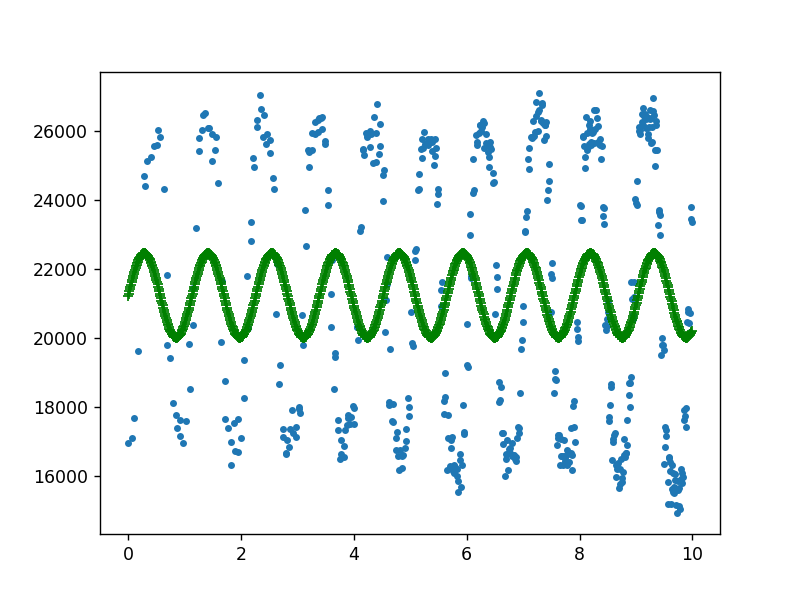

In [31]:
a = result.params['a'].value
m = result.params['m'].value
p = result.params['p'].value
b = result.params['b'].value

sin_y = sin_fit(x_axis, a=a, m=m, p=p, b=b)

plt.figure(1)
plt.plot(x_axis, y_axis, '.')
plt.plot(x_axis, sin_y, '+g')

# Trying manually 

<IPython.core.display.Javascript object>


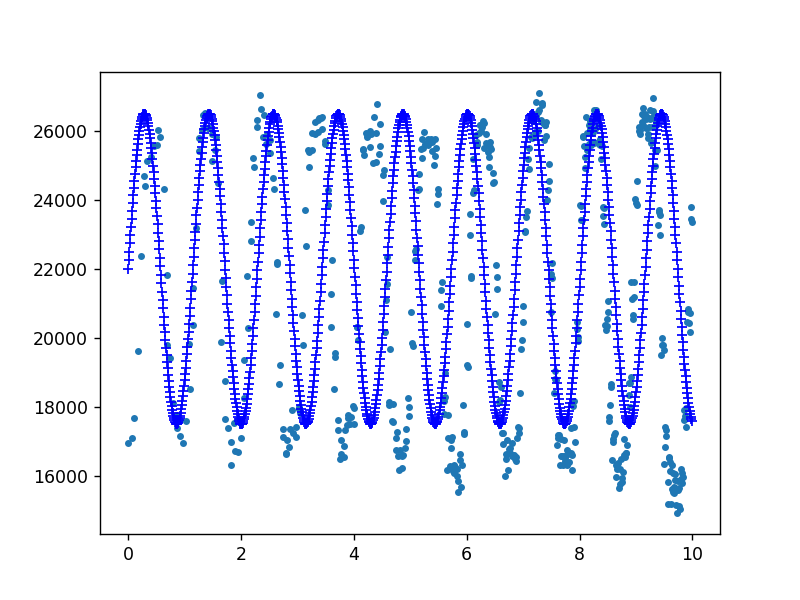

In [28]:
a = (26000-17000)/2
m = np.pi*100
p = 0
b = 22000

sin_y = sin_fit(x_axis, a=a, m=m, p=p, b=b)

plt.figure(2)
plt.plot(x_axis, y_axis, '.')
plt.plot(x_axis, sin_y, '+b')